In [5]:
import tensorflow as tf
from tensorflow import keras
models = keras.models
layers = keras.layers

import matplotlib.pyplot as plt


In [6]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=50

In [7]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2153 files belonging to 3 classes.


In [8]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [9]:
len(dataset)

68

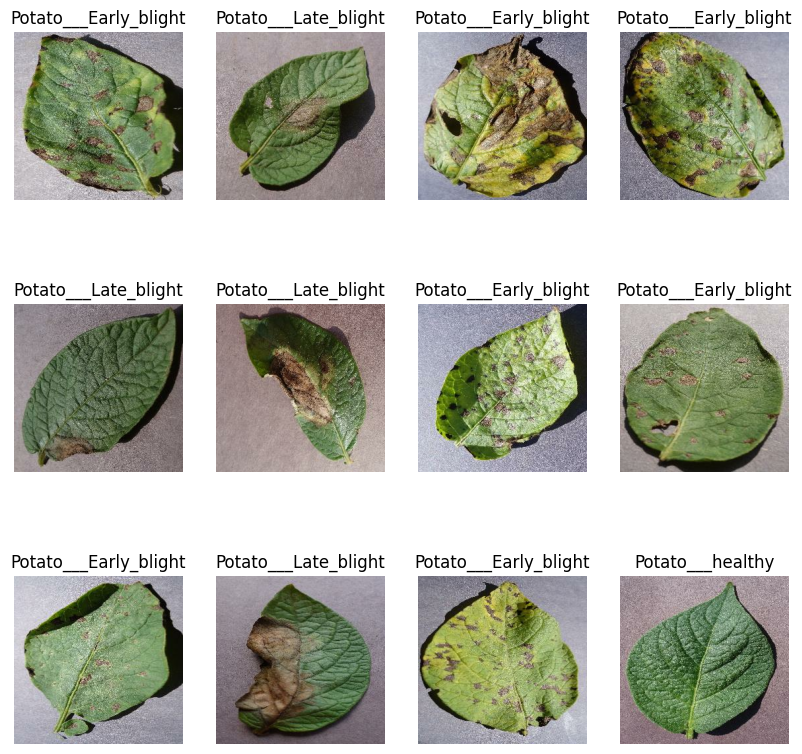

In [10]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [11]:
len(dataset)

68

In [ ]:
80% ==>training
20% ==>10% validation, 10% test

In [12]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [13]:
train_ds=dataset.take(54)
len(train_ds)

54

In [14]:
test_ds=dataset.skip(54)
len(test_ds)

14

In [15]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [16]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [17]:
test_ds=test_ds.skip(6)
len(test_ds)

8

In [18]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size + val_size)

    return train_ds, val_ds, test_ds


In [19]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset)

In [20]:
len(train_ds)

54

In [21]:
len(val_ds)

6

In [22]:
len(test_ds)

8

In [23]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


In [24]:
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    tf.keras.layers.Rescaling(1./255)
])


In [25]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [26]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3

model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu' ),
    layers.MaxPooling2D((2,2)),
     layers.Conv2D(64,kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape=input_shape)

C:\Program Files\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ sequential (Sequential)       │ (32, 256, 256, 3)     │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ sequential_1 (Sequential)     │ (32, 256, 256, 3)     │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d (Conv2D)               │ (32, 254, 254, 32)    │          896 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d (MaxPooling2D)  │ (32, 127, 127, 32)    │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_1 (Conv2D)             │ (32, 125, 125, 64)    │       18,496 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_1               │ (32, 62, 62, 64)      │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_2 (Conv2D)             │ (32, 60, 60, 64)      │       36,928 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_2               │ (32, 30, 30, 64)      │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_3 (Conv2D)             │ (32, 28, 28, 64)      │       36,928 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_3               │ (32, 14, 14, 64)      │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_4 (Conv2D)             │ (32, 12, 12, 64)      │       36,928 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_4               │ (32, 6, 6, 64)        │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_5 (Conv2D)             │ (32, 4, 4, 64)        │       36,928 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_5               │ (32, 2, 2, 64)        │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ flatten (Flatten)             │ (32, 256)             │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense (Dense)                 │ (32, 64)              │       16,448 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_1 (Dense)               │ (32, 3)               │          195 │
└───────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)


In [29]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 63s 970ms/step - accuracy: 0.5475 - loss: 0.8982 - val_accuracy: 0.4583 - val_loss: 0.8890
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 50s 921ms/step - accuracy: 0.6788 - loss: 0.6826 - val_accuracy: 0.7917 - val_loss: 0.5639
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 50s 930ms/step - accuracy: 0.8218 - loss: 0.4356 - val_accuracy: 0.8958 - val_loss: 0.2876
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 47s 878ms/step - accuracy: 0.8628 - loss: 0.3227 - val_accuracy: 0.8802 - val_loss: 0.2861
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 48s 892ms/step - accuracy: 0.8854 - loss: 0.2749 - val_accuracy: 0.9167 - val_loss: 0.2141
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 50s 918ms/step - accuracy: 0.8999 - loss: 0.2418 - val_accuracy: 0.8646 - val_loss: 0.2907
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 51s 954ms/step - accuracy: 0.9253 - loss: 0.1955 - val_accuracy: 0.9688 - val_loss: 0.1307
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 49s 908ms/step - accuracy: 0.9178 - loss: 0.2060 - val_accu

In [30]:
scores=model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 218ms/step - accuracy: 0.9766 - loss: 0.0678


In [31]:
scores

[0.06778044998645782, 0.9765625]

In [32]:
history

In [33]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [34]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [35]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

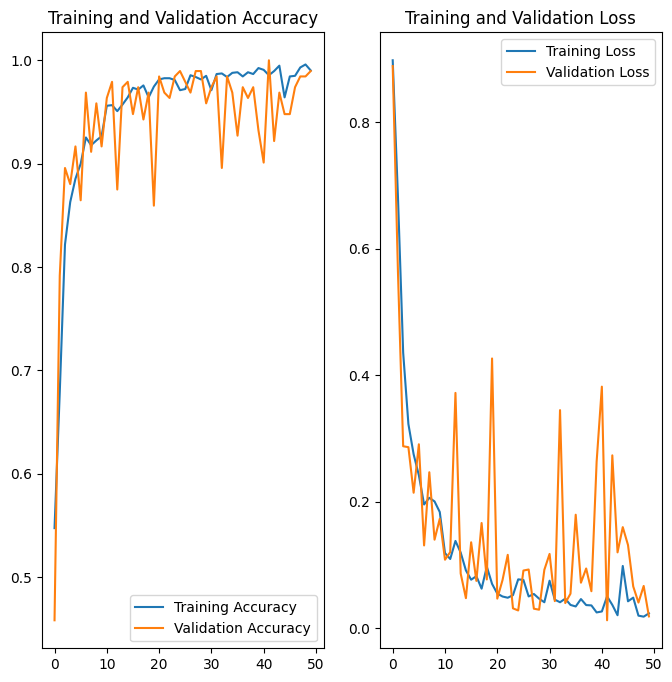

In [36]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [39]:
np.argmax([9.9999964e-01,3.9333537e-07,1.1586251e-18])

0

first image to predict
first image's actual label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
predicted label: Potato___Early_blight


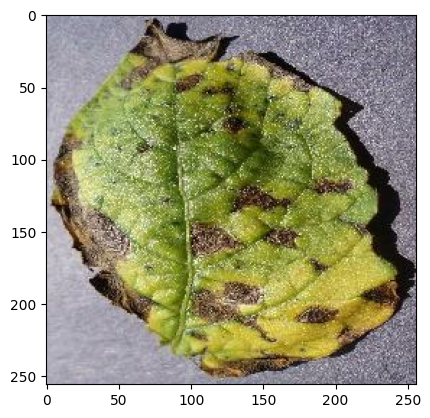

In [43]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image=images_batch[0].numpy().astype('uint8')
    first_label=labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("first image's actual label:",class_names[first_label])

    batch_prediction=model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])



In [44]:
import numpy as np
import tensorflow as tf

def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)  # Create a batch

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)

    return predicted_class, confidence


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


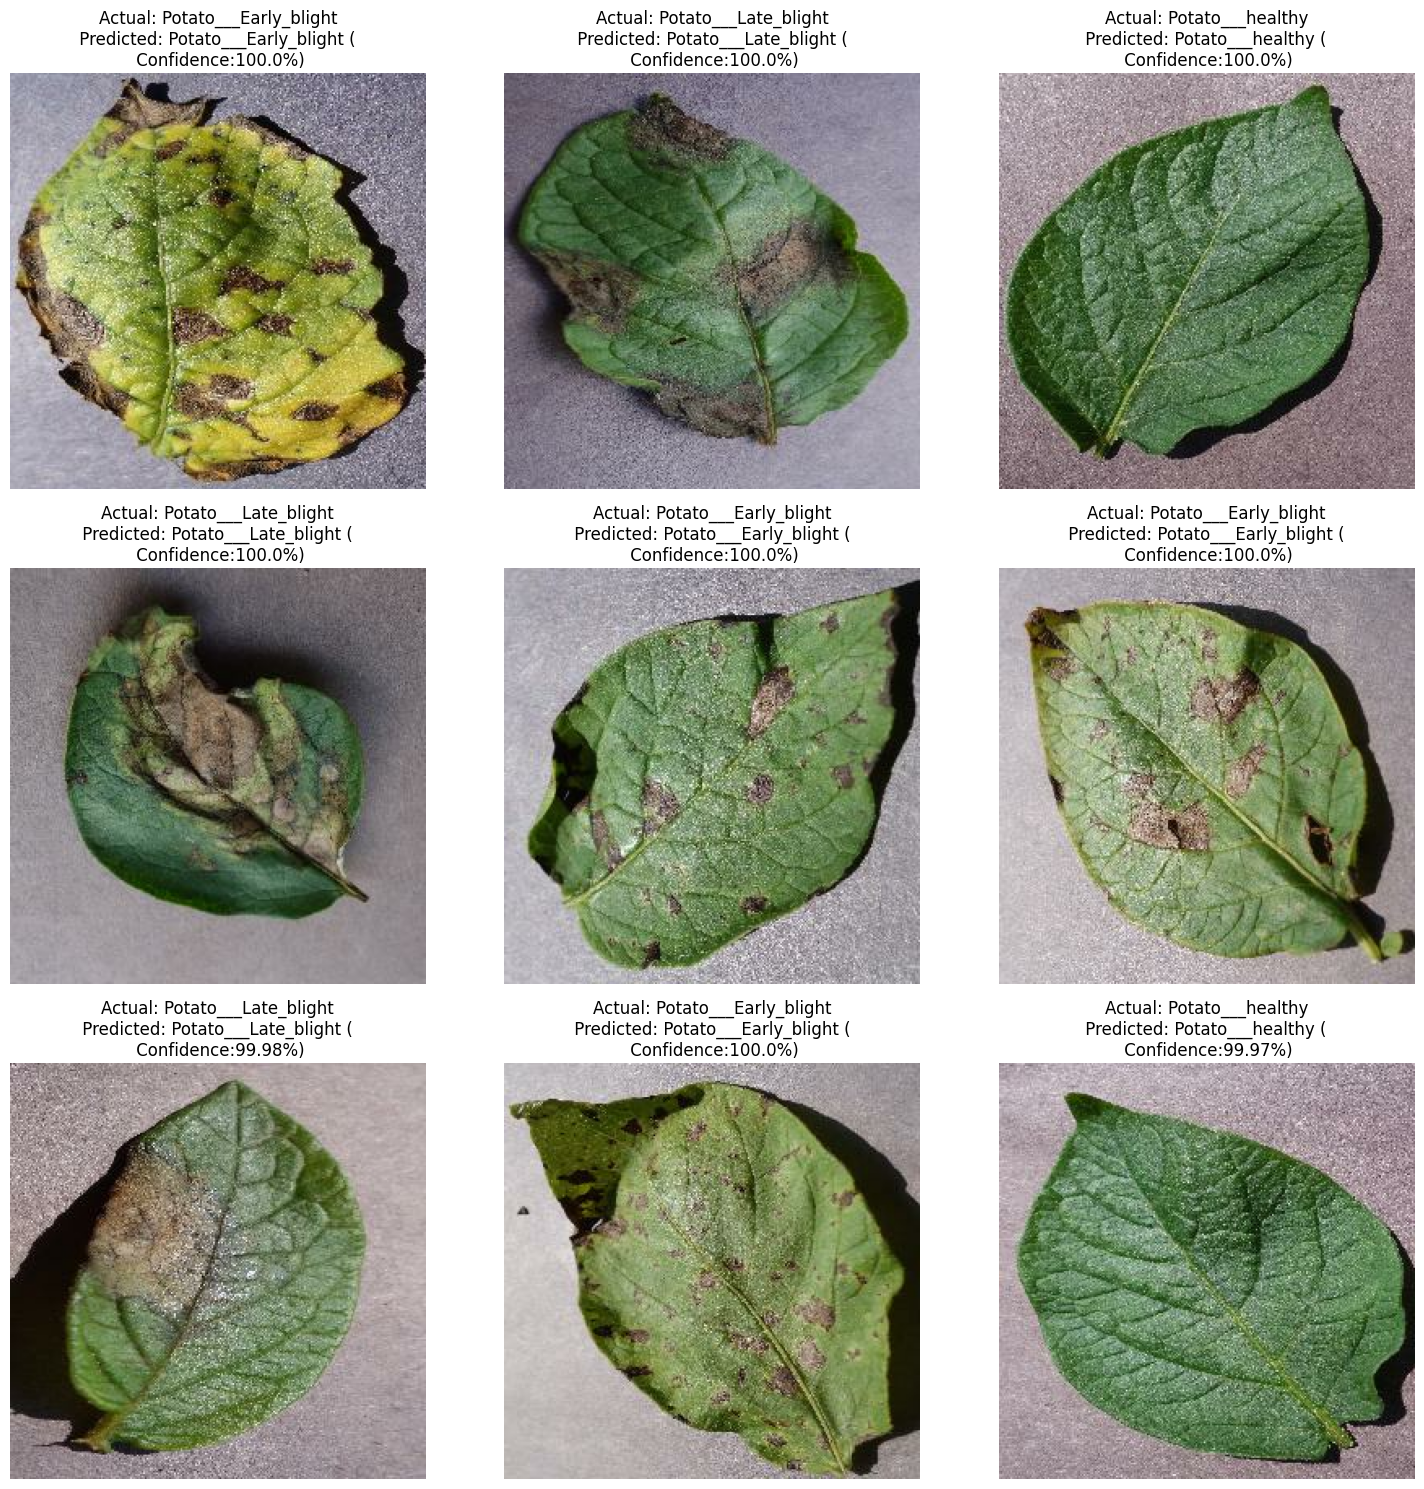

In [47]:
plt.figure(figsize=(15, 15))

for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class}\n Predicted: {predicted_class} ( \n Confidence:{confidence}%)")
        plt.axis("off")

plt.tight_layout()
plt.show()


In [48]:
import os

model_dir = "../saved_models"  # correct folder
os.makedirs(model_dir, exist_ok=True)

# auto-increment model version
model_version = max([int(i) for i in os.listdir(model_dir)] + [0]) + 1

# export model
model.export(f"{model_dir}/{model_version}")



INFO:tensorflow:Assets written to: ../saved_models/8\assets


INFO:tensorflow:Assets written to: ../saved_models/8\assets


Saved artifact at '../saved_models/8'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  1805272969680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1805272970448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1805272972560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1805272973136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1805277627024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1805277626448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1805277628560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1805277627792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1805277628944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1805277628752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1805272963152: TensorSpec(shape=(